In [3]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from retired.mapseq_fxns import * # import all functions from this script
# from math import log10
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
from scipy.stats import mannwhitneyu # nonparametric test
import random


%matplotlib inline

In [4]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'


In [5]:

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


In [6]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [9]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]

# clean-up datasets here
omc_clean = []
for i in range(num_samples):
    omc_clean.append(clean_up_data(omc_type[i]))


omc_pt = [(omc_clean[i][omc_clean[i]['type']=="PT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_clean[i][omc_clean[i]['type']=="IT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]



/Users/eisko/github_repos/MAPseq_analysis/retired/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/retired/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/retired/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).s

In [10]:

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_clean[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_clean[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

# Heatmaps

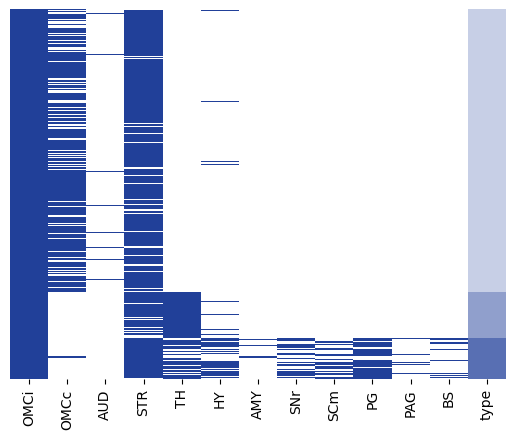

In [8]:
plot = omc_mm_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)


sns.heatmap(plot, cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)

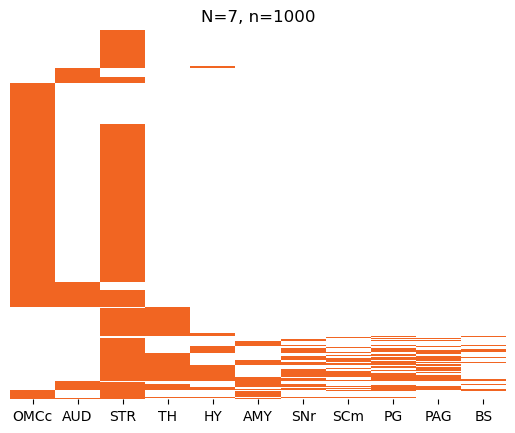

In [286]:
plot = omc_st_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
# plot = plot.sort_values(by=['type']).reset_index(drop=True)
plot = plot.sort_values(by=['type', 'OMCc', "AUD", "STR", "TH", "HY", "AMY", "SNr",
                            "SCm", "PG", "PAG", "BS"]).reset_index(drop=True)

sns.heatmap(plot.drop(["OMCi", "type"], axis=1), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title("N=7, n=1000")
plt.savefig(out_path+"st_n1000_heatmap.jpeg", dpi=300)

# heatmaps of an individual animal

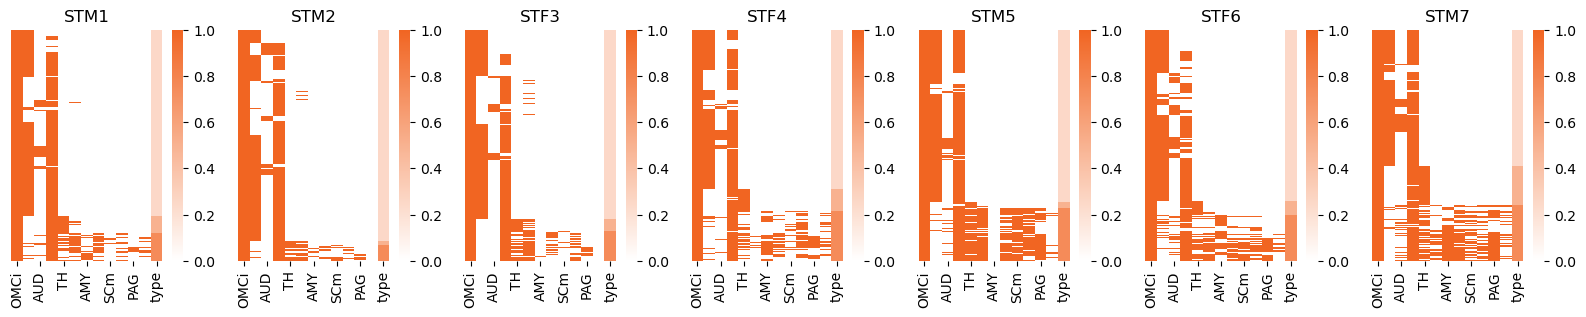

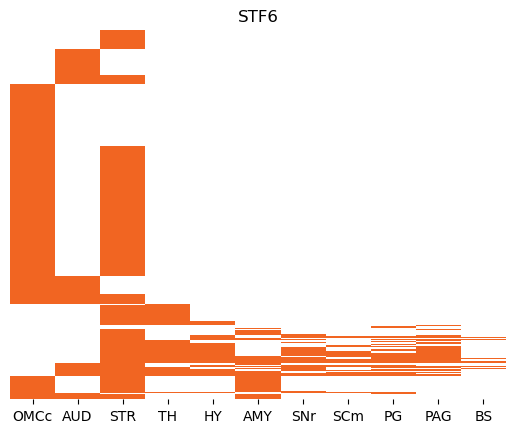

In [292]:
fig, axs = plt.subplots(1, len(omc_st), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_st[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot, cmap=orange_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])
    i+=1
    
# fig.savefig(out_path+"omc_st_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_st[5]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
# plot = plot.sort_values(by=['type']).reset_index(drop=True)
plot = plot.sort_values(by=['type', 'OMCc', "AUD", "STR", "TH", "HY", "AMY", "SNr",
                            "SCm", "PG", "PAG", "BS"]).reset_index(drop=True)

sns.heatmap(plot.drop(["OMCi", "type"], axis=1), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_st[5])
# plt.arrow(-0.4,480,.1, 0, head_width=1)
# plt.text(-0.3,480, "a-", va="center_baseline")
# plt.text(-0.3,820, "b-", va="center_baseline")
# plt.text(-0.3,953, "c-", va="center_baseline")
# plt.savefig(out_path + "st_STF6_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# Highlight individual neurons

In [294]:
plot

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,type
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.75
1045,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.75
1046,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.75
1047,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.75


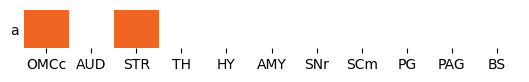

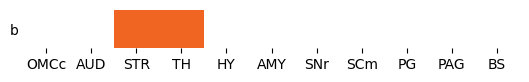

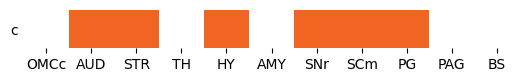

In [293]:
# IT neuron 480
it_480 = plot.iloc[480, :]
it_plot = pd.DataFrame(it_480).T
# it_nplot = pd.concat([it_480]*3)
plt.figure(figsize=(6.4,0.5))
sns.heatmap(it_plot.drop(["OMCi", "type"], axis=1), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.text(-0.3, 0.5, "a", va="center_baseline")
plt.savefig(out_path + "st_it480_STF6_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# CT neuron 820
ct_820 = plot.iloc[820, :]
ct_plot = pd.DataFrame(ct_820).T
# it_nplot = pd.concat([it_480]*3)
plt.figure(figsize=(6.4,0.5))
sns.heatmap(ct_plot.drop(["OMCi", "type"], axis=1), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.text(-0.3, 0.5, "b", va="center_baseline")
plt.savefig(out_path + "st_ct820_STF6_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# PT neuron 943
pt_953 = plot.iloc[953, :]
pt_plot = pd.DataFrame(pt_953).T
# it_nplot = pd.concat([it_480]*3)
plt.figure(figsize=(6.4,0.5))
sns.heatmap(pt_plot.drop(["OMCi", "type"], axis=1), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.text(-0.3, 0.5, "c", va="center_baseline")
plt.savefig(out_path + "st_pt953_STF6_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# lab mouse

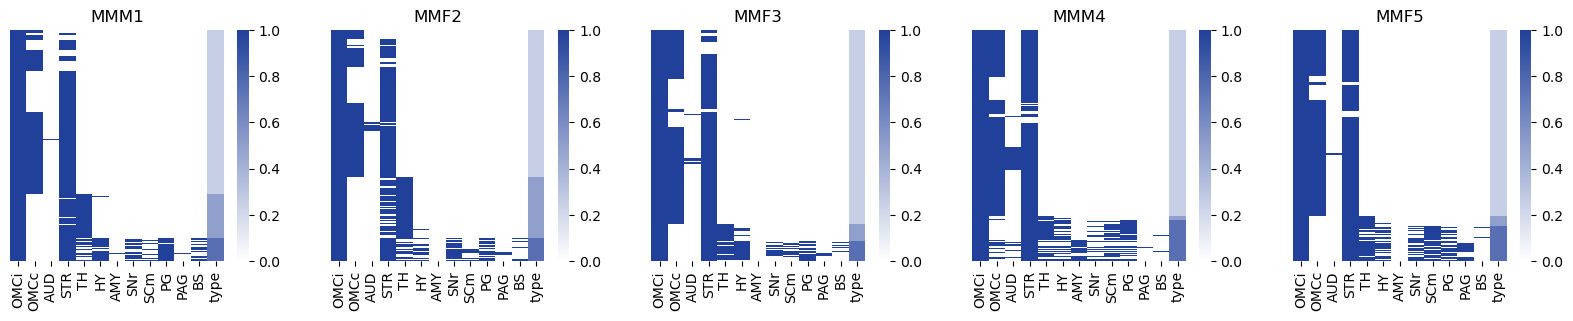

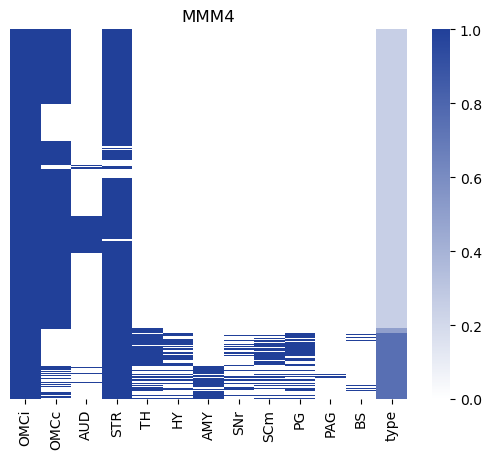

In [9]:
fig, axs = plt.subplots(1, len(omc_mm), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_mm[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot, cmap=blue_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_mm[i])
    i+=1
    
# fig.savefig(out_path+"omc_mm_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_mm[3]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot, cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_mm[3])
# plt.savefig(out_path + "MM_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# summary plots

# histograms

In [11]:
def dfs_to_proportions(df_list, drop=["OMCi", "type"], cell_type=None):
    """Output dataframe of proportions in format that can be plotted with seaborn

    Args:
        df_list (list): 
            - List of dataframes of neurons/BC by areas, must be of num_samples size (12)
        drop (list, optional): 
            - Defaults to ["OMCi", "type"]
            - list of areas/columns to drop before calculating proportions
        cell_type (string, optional): 
            - Specify cell types in df, either IT, CT or PT
            - Defaults to None

    Returns:
        plot_df (pandas_dataframe):
            - returns dataframe in format for seaborn plotting
            - columns = areas, and other metadata
    """

    plot_df = pd.DataFrame(columns=["area", "proportion", "mice", "species", "dataset"])

    if cell_type == "IT":
        drop = ["OMCi", 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']
    elif cell_type == "PT":
        drop = ["OMCi",'OMCc', 'AUD']

    # mice = []
    # species = []
    # dataset = []

    for i in range(len(df_list)):
        df = df_list[i].drop(drop, axis=1)
        bc_sum = df.sum()
        proportion = bc_sum/df.shape[0]
        df_add = pd.DataFrame({"area":proportion.index.values, "proportion":proportion.values, 
        "mice":mice[i], "species":species[i], "dataset":dataset[i]})
        plot_df = pd.concat([plot_df, df_add])
    
    return plot_df

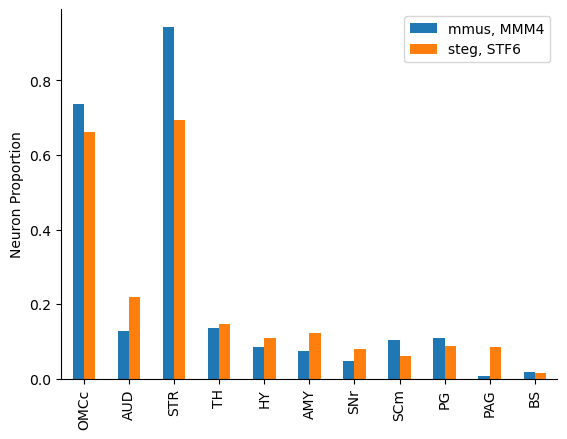

In [11]:
omc_mm_int = omc_mm[3].drop(["OMCi", "type"], axis=1)
mm_sum = omc_mm_int.sum()
mm_proportion = mm_sum/omc_mm_int.shape[0]

omc_st_int = omc_st[5].drop(["OMCi", "type"], axis=1)
st_sum = omc_st_int.sum()
st_proportion = st_sum/omc_st_int.shape[0]

plot_df = pd.DataFrame(columns=['mmus', 'steg'])
# plot_df
plot_df['mmus'] = mm_proportion
plot_df['steg'] = st_proportion

plot_df.plot(kind='bar')
plt.ylabel("Neuron Proportion")
# plt.xlabel("Node Degree")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(labels=["mmus, "+mice_mm[3], "steg, "+mice_st[5]])

# plt.savefig(out_path+"proj_hist_N1.jpeg", dpi=300, bbox_inches="tight")

Text(0, 0.5, 'Neuron Proportion')

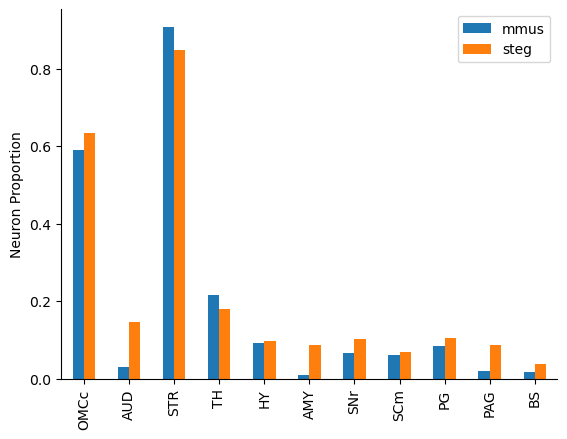

In [12]:
omc_mm_int = omc_mm_all.drop(["OMCi", "type"], axis=1)
mm_sum = omc_mm_int.sum()
mm_proportion = mm_sum/omc_mm_int.shape[0]

omc_st_int = omc_st_all.drop(["OMCi", "type"], axis=1)
st_sum = omc_st_int.sum()
st_proportion = st_sum/omc_st_int.shape[0]

plot_df = pd.DataFrame(columns=['mmus', 'steg'])
# plot_df
plot_df['mmus'] = mm_proportion
plot_df['steg'] = st_proportion


plot_df.plot(kind='bar')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel("Neuron Proportion")
# plt.savefig(out_path+'mm_st_hist.jpeg', dpi=300)

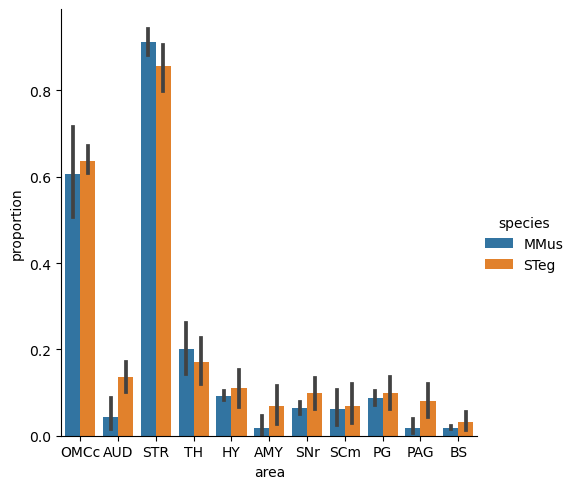

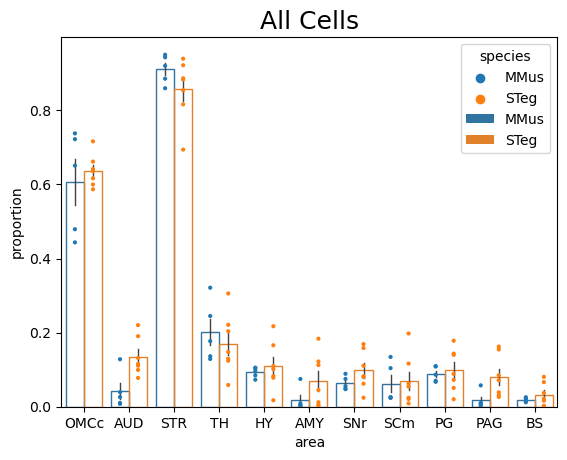

In [13]:
# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_clean)

sns.catplot(plot_df, x="area", y="proportion", hue="species", kind="bar")
# plt.savefig(out_path + "all_hist_bar.jpeg", dpi=300, bbox_inches="tight")
plt.show()

dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

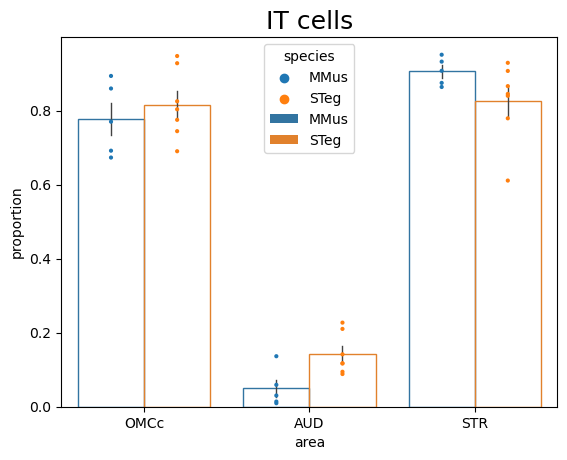

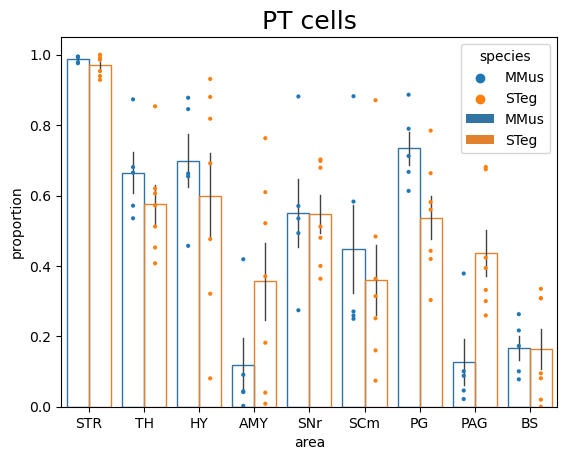

In [14]:
### IT

# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_it, cell_type="IT")

dot_bar_plot(plot_df, "IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

### PT
# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")

dot_bar_plot(plot_df, "PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

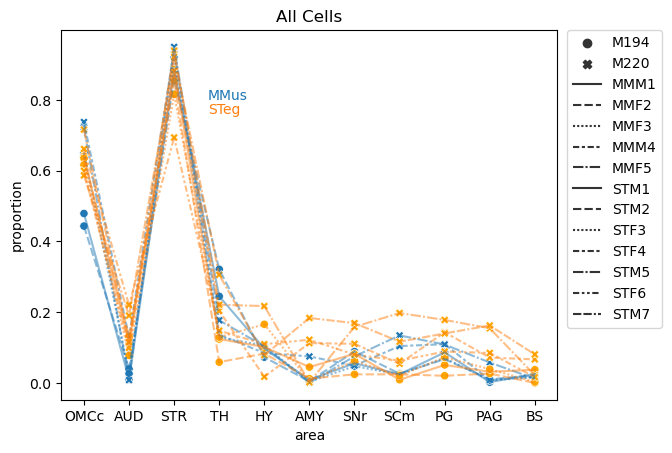

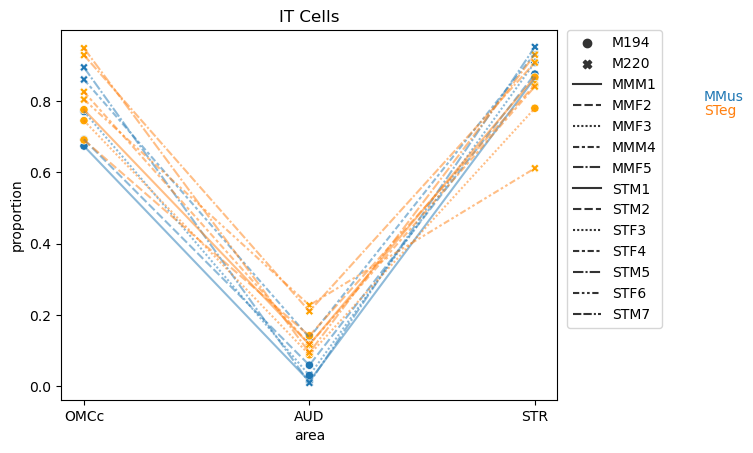

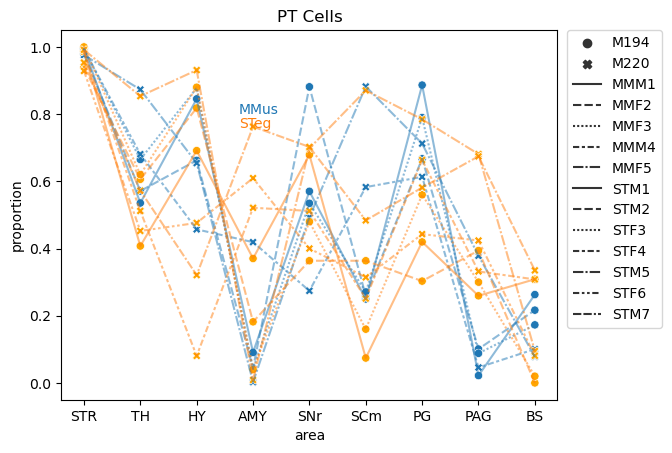

In [15]:
# all cells
plot_df = dfs_to_proportions(omc_clean)
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion")
plt.show()

# it cells
plot_df = dfs_to_proportions(omc_it, cell_type="IT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "IT Cells", xaxis="area", yaxis="proportion")
plt.show()

# pt cells
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "PT Cells", xaxis="area", yaxis="proportion")
plt.show()

# Polar plots

In [51]:
blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]
orange_qual = [orange_cmp.colors[36], orange_cmp.colors[72], orange_cmp.colors[108], orange_cmp.colors[144], orange_cmp.colors[180], orange_cmp.colors[216], orange_cmp.colors[252]]

In [177]:
plot_df = dfs_to_proportions(omc_clean)
plot_mm = plot_df[plot_df.species == 'MMus']
plot_mm = plot_mm[plot_mm.area != 'STR'] # drop STR
N = plot_mm.area.unique().shape[0]
angles = [n / float(N) * 2 * np.pi for n in range(N)] # in radians
angles.append(2*np.pi)
angles

[0.0,
 0.6283185307179586,
 1.2566370614359172,
 1.8849555921538759,
 2.5132741228718345,
 3.141592653589793,
 3.7699111843077517,
 4.39822971502571,
 5.026548245743669,
 5.654866776461628,
 6.283185307179586]

In [ ]:


# fig, axs = plt.subplots(1,2, figsize=(10,5), projection='polar')

for i in range(len(mice_mm)):
    test = plot_mm[plot_mm['mice']==mice_mm[i]]
    values = test.proportion
    plt.polar(angles, values, label = mice_mm[i])

plt.ylim(0,1)
plt.xticks(angles, plot_mm.area.unique())
plt.legend()
plt.show()


In [205]:
s = test.proportion
s.loc[len(s)+1] = s.loc[0]
np.log10(s)

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/2320563475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[len(s)+1] = s.loc[0]


0    -0.231520
1    -0.720403
3    -0.514689
4    -1.105753
5    -0.736008
6    -0.771875
7    -0.933818
8    -0.853941
9    -0.789483
10   -1.093519
11   -0.231520
Name: proportion, dtype: float64

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3694131597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3694131597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3694131597.py:7: SettingWithCopyWa

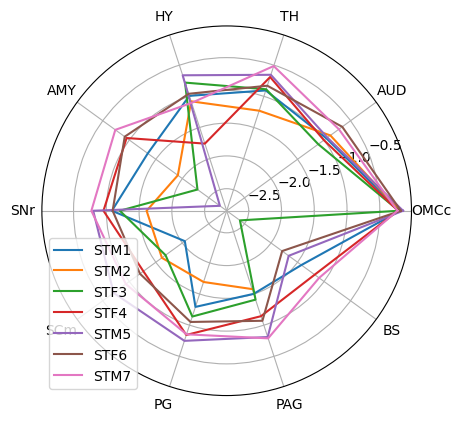

In [207]:

plot_st = plot_df[plot_df.species == 'STeg']
plot_st = plot_st[plot_st.area != 'STR'] # drop STR

for i in range(len(mice_st)):
    test = plot_st[plot_st['mice']==mice_st[i]]
    values = test.proportion
    values.loc[len(s)+1] = values.loc[0]
    values = np.log10(values)
    plt.polar(angles, values, label = mice_st[i])

# plt.ylim(0,1)
plt.xticks(angles[:-1], plot_st.area.unique())

plt.legend()

plt.show()

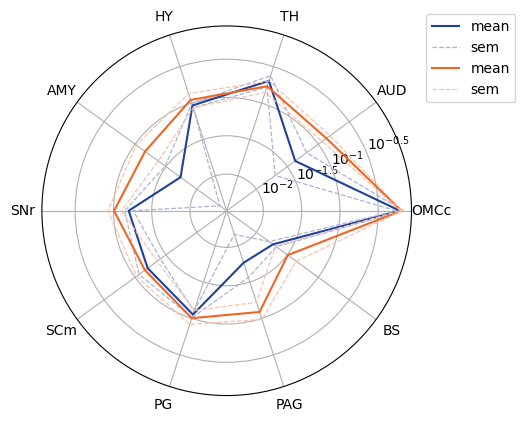

In [235]:
mean = plot_mm.groupby('area', sort = False, as_index=False)['proportion'].mean()
sem = plot_mm.groupby('area', sort = False, as_index=False)['proportion'].sem()
mean_sem = mean['proportion'] + sem['proportion']
sem_mean = mean['proportion'] - sem['proportion']
mm_all = pd.DataFrame({'area':mean['area'], 'mean':mean['proportion'], 'mean_sem':mean_sem, 'sem_mean':sem_mean})

v_mean = mm_all['mean']
v_mean_sem = mm_all['mean_sem']
v_sem_mean = mm_all['sem_mean']

v_mean.loc[len(s)+1] = v_mean.loc[0]
v_mean_sem.loc[len(s)+1] = v_mean_sem.loc[0]
v_sem_mean.loc[len(s)+1] = v_sem_mean.loc[0]

v_mean = np.log10(v_mean)
v_mean_sem = np.log10(v_mean_sem)
v_sem_mean = np.log10(v_sem_mean)


plt.polar(angles, v_mean, color=blue_cmp.colors[255], label = 'mean')
plt.polar(angles, v_mean_sem, color=blue_cmp.colors[100], linestyle = '--', linewidth=0.9, label = 'sem')
plt.polar(angles, v_sem_mean, color=blue_cmp.colors[100], linestyle = '--', linewidth=0.9)

# st
mean = plot_st.groupby('area', sort = False, as_index=False)['proportion'].mean()
sem = plot_st.groupby('area', sort = False, as_index=False)['proportion'].sem()
mean_sem = mean['proportion'] + sem['proportion']
sem_mean = mean['proportion'] - sem['proportion']
st_all = pd.DataFrame({'area':mean['area'], 'mean':mean['proportion'], 'mean_sem':mean_sem, 'sem_mean':sem_mean})

v_mean = st_all['mean']
v_mean_sem = st_all['mean_sem']
v_sem_mean = st_all['sem_mean']

v_mean.loc[len(s)+1] = v_mean.loc[0]
v_mean_sem.loc[len(s)+1] = v_mean_sem.loc[0]
v_sem_mean.loc[len(s)+1] = v_sem_mean.loc[0]

v_mean = np.log10(v_mean)
v_mean_sem = np.log10(v_mean_sem)
v_sem_mean = np.log10(v_sem_mean)

plt.polar(angles, v_mean, color=orange_cmp.colors[255], label = 'mean')
plt.polar(angles, v_mean_sem, color=orange_cmp.colors[100], linestyle = '--', linewidth=0.9, label = 'sem')
plt.polar(angles, v_sem_mean, color=orange_cmp.colors[100], linestyle = '--', linewidth=0.9,)




# plt.ylim(0,0.7)
plt.xticks(angles[:-1], plot_st.area.unique())
plt.yticks([-2,-1.5,-1,-0.5],['$10^{-2}$','$10^{-1.5}$','$10^{-1}$','$10^{-0.5}$'])
# plt.yticks([-5,-4,-3,-2,-1],['0.0001','0.001','0.01','0.1','1'])
# plt.yscale('symlog')
plt.legend(bbox_to_anchor=(1.3, 1.05))

plt.show()

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/1711139653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/1711139653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/1711139653.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

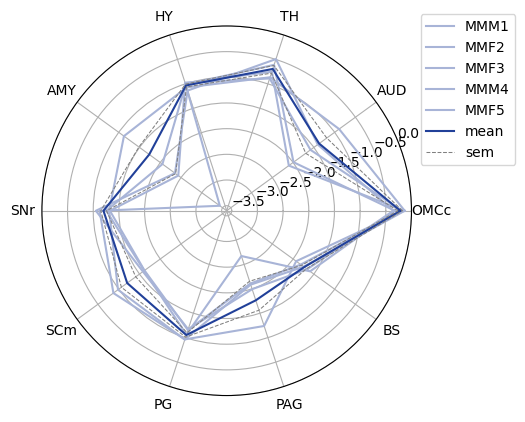

In [236]:
plot_df = dfs_to_proportions(omc_clean)
plot_mm = plot_df[plot_df.species == 'MMus']
plot_mm = plot_mm[plot_mm.area != 'STR'] # drop STR
N = plot_mm.area.unique().shape[0]
angles = [n / float(N) * 2 * np.pi for n in range(N)] # in radians
angles.append(2*np.pi)

# fig, axs = plt.subplots(1,2, figsize=(10,5), projection='polar')

for i in range(len(mice_mm)):
    test = plot_mm[plot_mm['mice']==mice_mm[i]]
    values = test.proportion
    values.loc[len(s)+1] = values.loc[0]
    values = np.log10(values)
    plt.polar(angles, values, color=blue_qual[1], label = mice_mm[i])

mean = plot_mm.groupby('area', sort = False, as_index=False)['proportion'].mean()
sem = plot_mm.groupby('area', sort = False, as_index=False)['proportion'].sem()
mean_sem = mean['proportion'] + sem['proportion']
sem_mean = mean['proportion'] - sem['proportion']
mm_all = pd.DataFrame({'area':mean['area'], 'mean':mean['proportion'], 'mean_sem':mean_sem, 'sem_mean':sem_mean})

v_mean = mm_all['mean']
v_mean_sem = mm_all['mean_sem']
v_sem_mean = mm_all['sem_mean']

v_mean.loc[len(s)+1] = v_mean.loc[0]
v_mean_sem.loc[len(s)+1] = v_mean_sem.loc[0]
v_sem_mean.loc[len(s)+1] = v_sem_mean.loc[0]

v_mean = np.log10(v_mean)
v_mean_sem = np.log10(v_mean_sem)
v_sem_mean = np.log10(v_sem_mean)


plt.polar(angles, v_mean, color=blue_cmp.colors[255], label = 'mean')
plt.polar(angles, v_mean_sem, color="grey", linestyle = '--', linewidth=0.75, label = 'sem')
plt.polar(angles, v_sem_mean, color="grey", linestyle = '--', linewidth=0.75)

# plt.ylim(0,0.75)
plt.xticks(angles[:-1], plot_mm.area.unique())
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3067319333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3067319333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(s)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_9770/3067319333.py:13: SettingWithCop

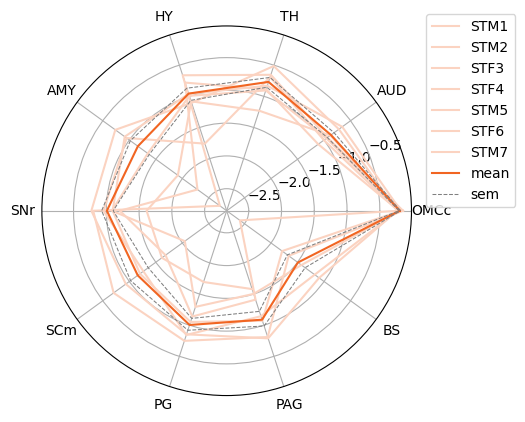

In [238]:
plot_df = dfs_to_proportions(omc_clean)
plot_st = plot_df[plot_df.species == 'STeg']
plot_st = plot_st[plot_st.area != 'STR'] # drop STR
N = plot_st.area.unique().shape[0]
angles = [n / float(N) * 2 * np.pi for n in range(N)] # in radians
angles.append(2*np.pi)

# fig, axs = plt.subplots(1,2, figsize=(10,5), projection='polar')

for i in range(len(mice_st)):
    test = plot_st[plot_st['mice']==mice_st[i]]
    values = test.proportion
    values.loc[len(s)+1] = values.loc[0]
    values = np.log10(values)
    plt.polar(angles, values, color=orange_qual[1], label = mice_st[i])

mean = plot_st.groupby('area', sort = False, as_index=False)['proportion'].mean()
sem = plot_st.groupby('area', sort = False, as_index=False)['proportion'].sem()
mean_sem = mean['proportion'] + sem['proportion']
sem_mean = mean['proportion'] - sem['proportion']
st_all = pd.DataFrame({'area':mean['area'], 'mean':mean['proportion'], 'mean_sem':mean_sem, 'sem_mean':sem_mean})

v_mean = st_all['mean']
v_mean_sem = st_all['mean_sem']
v_sem_mean = st_all['sem_mean']

v_mean.loc[len(s)+1] = v_mean.loc[0]
v_mean_sem.loc[len(s)+1] = v_mean_sem.loc[0]
v_sem_mean.loc[len(s)+1] = v_sem_mean.loc[0]

v_mean = np.log10(v_mean)
v_mean_sem = np.log10(v_mean_sem)
v_sem_mean = np.log10(v_sem_mean)

plt.polar(angles, v_mean, color=orange_cmp.colors[255], label = 'mean')
plt.polar(angles, v_mean_sem, color='grey', linestyle = '--', linewidth=0.75, label = 'sem')
plt.polar(angles, v_sem_mean, color="grey", linestyle = '--', linewidth=0.75)

# plt.ylim(0,0.75)
plt.xticks(angles[:-1], plot_st.area.unique())
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

# color plots
Mean vs. summary proportion?

MEAN - ALL CELLS


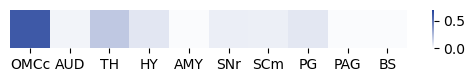

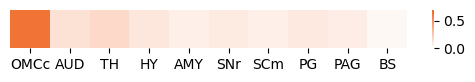

In [168]:
# # mean
print('MEAN - ALL CELLS')

test = pd.DataFrame(columns = mm_all['area'])
test.loc[0] = mm_all['mean'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=blue_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

test = pd.DataFrame(columns = st_all['area'])
test.loc[0] = st_all['mean'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=orange_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

SUM - ALL CELLS
ALL CELLS


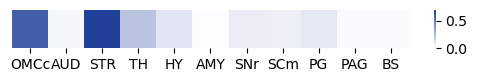

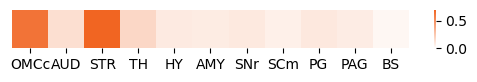

In [165]:
print('SUM - ALL CELLS')

# # mean
print('ALL CELLS')

mm_summary = dfs_to_proportions([pd.concat(omc_mm)])

test = pd.DataFrame(columns = mm_summary['area'])
test.loc[0] = mm_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=blue_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

st_summary = dfs_to_proportions([pd.concat(omc_st)])

test = pd.DataFrame(columns = st_summary['area'])
test.loc[0] = st_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=orange_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

SUM - ALL CELLS
IT CELLS


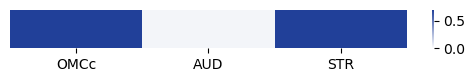

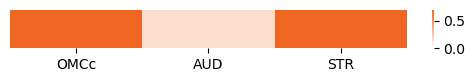

In [171]:
print('SUM - ALL CELLS')

# # mean
print('IT CELLS')

mm_summary = dfs_to_proportions([pd.concat(omc_it_mm)], cell_type="IT")

test = pd.DataFrame(columns = mm_summary['area'])
test.loc[0] = mm_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=blue_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

st_summary = dfs_to_proportions([pd.concat(omc_it_st)], cell_type="IT")

test = pd.DataFrame(columns = st_summary['area'])
test.loc[0] = st_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=orange_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

SUM - ALL CELLS
PT CELLS


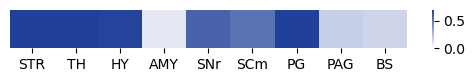

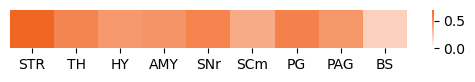

In [172]:
print('SUM - ALL CELLS')

# # mean
print('PT CELLS')

mm_summary = dfs_to_proportions([pd.concat(omc_pt_mm)], cell_type="PT")

test = pd.DataFrame(columns = mm_summary['area'])
test.loc[0] = mm_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=blue_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

st_summary = dfs_to_proportions([pd.concat(omc_pt_st)], cell_type="PT")

test = pd.DataFrame(columns = st_summary['area'])
test.loc[0] = st_summary['proportion'].values

plt.figure(figsize=(6.4,0.5))
sns.heatmap(test, cmap=orange_cmp, vmin=0, vmax=0.7)
plt.gca().get_yaxis().set_visible(False)
plt.xlabel(None)
plt.show()

# Dot Plots

In [12]:
it_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_it[i].shape[0]
    prop = omc_it[i].sum()/total
    it_OMC_proportions.append(prop)


In [13]:
# dot plots for individual areas
areas = omc_it[0].columns

all_it_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(it_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_it_OMC_proportions.append(area_proportion)

In [14]:
areasi = pd.Series(data=list(range(len(areas))), index=areas)
# areasi

In [19]:
# all_it_OMC_proportions

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


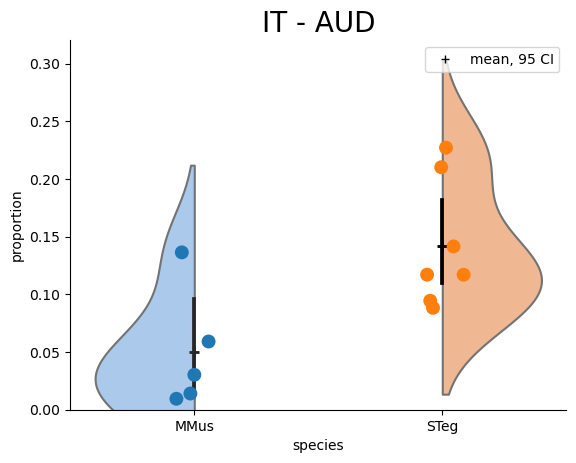

In [276]:
# AUD
i = areasi["AUD"]
fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


,mice,species,dataset,proportion
0,MMM1,MMus,M194,0.673190
1,MMF2,MMus,M194,0.691713
2,MMF3,MMus,M194,0.770122
3,STM1,STeg,M194,0.775093
4,STM2,STeg,M194,0.690265
5,STF3,STeg,M194,0.744479
6,MMM4,MMus,M220,0.859723
7,MMF5,MMus,M220,0.893671
8,STF4,STeg,M220,0.825185
9,STM5,STeg,M220,0.947507


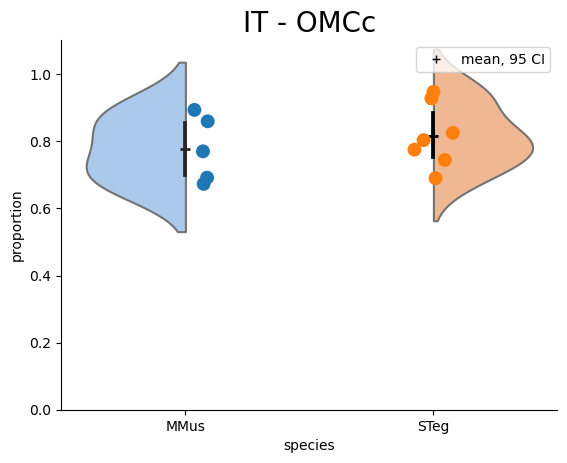

In [277]:
# OMCc
i = areasi["OMCc"]
fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])



df
# plt.savefig(out_path+"it_omcc_dotplot.jpeg", dpi=300, bbox_inches='tight')

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


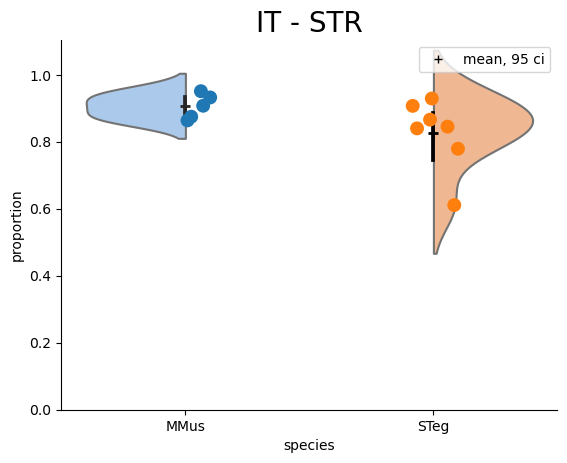

In [278]:
# STR
i = areasi["STR"]

fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', 
                      color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 ci")
plt.legend(handles=[test])


# plt.savefig(out_path+"it_STR_dotplot.jpeg", dpi=300, bbox_inches='tight')

In [279]:
pt_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_pt[i].shape[0]
    prop = omc_pt[i].sum()/total
    pt_OMC_proportions.append(prop)


# dot plots for individual areas
areas = omc_pt[0].columns

all_pt_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(pt_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_pt_OMC_proportions.append(area_proportion)

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


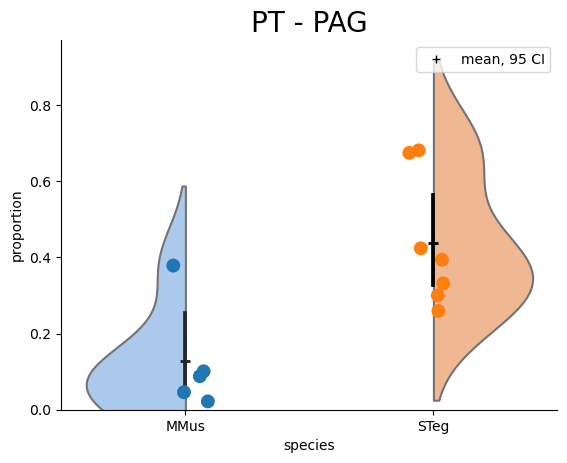

In [281]:
# PAG
i = areasi["PAG"]

fig, ax = plt.subplots()
df = all_pt_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])

# plt.savefig(out_path+"pt_PAG_dotplot.jpeg", dpi=300, bbox_inches='tight')

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


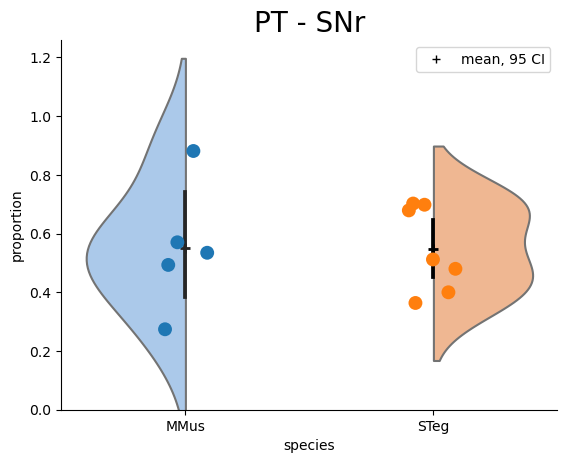

In [282]:
# SNr
i = areasi["SNr"]
fig, ax = plt.subplots()
df = all_pt_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])

# plt.savefig(out_path+"pt_SNr_dotplot.jpeg", dpi=300, bbox_inches='tight')b

# Dot plot + histogram

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


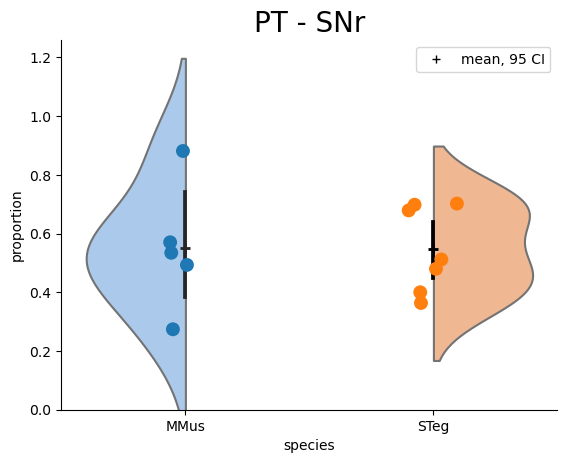

In [275]:
# SNr
i = areasi["SNr"]
fig, ax = plt.subplots()
df = all_pt_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
violin = sns.violinplot(df, x='species',y="proportion",
            split=True, hue ='species', inner = None, 
            palette="pastel",legend=False)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:

plt.title("PT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])



# Calculate probs?

In [35]:
# combine it/pt into one df
omc_mm_it_all = pd.concat(omc_it_mm)
omc_mm_pt_all = pd.concat(omc_pt_mm)
omc_st_it_all = pd.concat(omc_it_st)
omc_st_pt_all = pd.concat(omc_pt_st)


In [36]:
sim_reps = 1000
sim_sample_size=300

In [37]:
# create distribution by randomly sampling data
mm_it_probs = est_proj_prob(omc_mm_it_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_it_probs = est_proj_prob(omc_st_it_all, reps=sim_reps, sample_size=sim_sample_size)

mm_it_probs = pd.DataFrame(mm_it_probs, columns=omc_mm_it_all.columns)
st_it_probs = pd.DataFrame(st_it_probs, columns=omc_st_it_all.columns)


In [38]:
# create distribution by randomly sampling data
mm_pt_probs = est_proj_prob(omc_mm_pt_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_pt_probs = est_proj_prob(omc_st_pt_all, reps=sim_reps, sample_size=sim_sample_size)

mm_pt_probs = pd.DataFrame(mm_pt_probs, columns=omc_mm_pt_all.columns)
st_pt_probs = pd.DataFrame(st_pt_probs, columns=omc_st_pt_all.columns)


# try with t test
- parametric test between samples to calc pvalues

In [15]:
mmus_it_prop = []
steg_it_prop = []
for i in range(len(all_it_OMC_proportions)):
    df = all_it_OMC_proportions[i]
    mm = df[df["species"]=="MMus"]
    mmus_it_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_it_prop.append(st["proportion"])
mmus_it_array = np.array(mmus_it_prop)
steg_it_array = np.array(steg_it_prop)


In [18]:
steg_it_array.shape

(12, 7)

In [82]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_it_array, steg_it_array, axis=1) # parametric
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_it_array.mean(axis=1)
plot["st_mean"] = steg_it_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"]) # modulation index
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_it = ["OB", "OMCi", "ACAi", "ACAc", "TH", "HY", "AMY", "HIP", "SNr", "SCm", "PG", "PAG", "BS"]
idx = plot["area"].isin(non_it)
plot = plot[~idx].reset_index(drop=True)


plot



/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_4800/1914964215.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = stats.ttest_ind(mmus_it_array, steg_it_array, axis=1) # parametric


,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,OMCc,0.505529,0.777684,0.816308,1.049665,0.069929,0.296254
1,AUD,0.015257,0.049884,0.142284,2.852322,1.512137,1.816517
2,STR,0.139199,0.905937,0.825408,0.911109,-0.134304,0.856365


Text(0, 0.5, '-log10(p-value)')

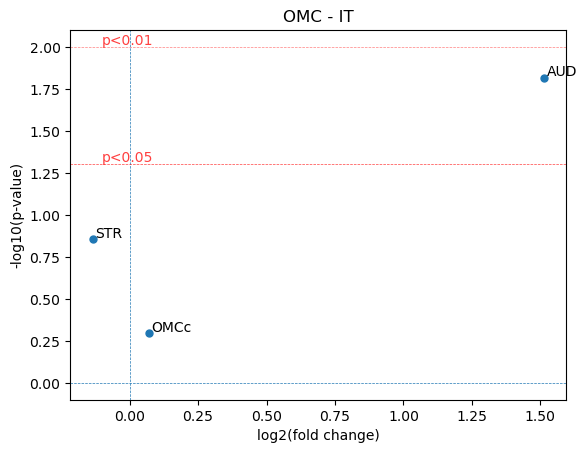

In [83]:

df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - IT")
plt.xlabel('log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_it_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_it_volcano.svg',dpi=300, bbox_inches='tight')

In [77]:
mmus_pt_prop = []
steg_pt_prop = []
for i in range(len(all_pt_OMC_proportions)):
    df = all_pt_OMC_proportions[i]
    mm = df[df["species"]=="MMus"]
    mmus_pt_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_pt_prop.append(st["proportion"])
mmus_pt_array = np.array(mmus_pt_prop)
steg_pt_array = np.array(steg_pt_prop)



In [80]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_pt_array, steg_pt_array, axis=1)
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_pt_array.mean(axis=1)
plot["st_mean"] = steg_pt_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"])
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_pt = ["OB", "OMCi", "ACAi", "ACAc", "HIP"]
idx = plot["area"].isin(non_pt)
plot = plot[~idx].reset_index(drop=True)

plot

/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_4800/2423164080.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results = stats.ttest_ind(mmus_pt_array, steg_pt_array, axis=1)


,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,OMCc,0.302302,0.064130,0.127057,1.981242,0.986405,0.519559
1,AUD,0.030979,0.025360,0.145893,5.752810,2.524267,1.508936
2,STR,0.209732,0.987339,0.969467,0.981899,-0.026354,0.678336
3,TH,0.297129,0.665107,0.574748,0.864144,-0.210656,0.527055
4,HY,0.540858,0.699379,0.599752,0.857549,-0.221709,0.266916
5,AMY,0.136524,0.119524,0.356350,2.981415,1.575997,0.864792
6,SNr,0.978673,0.550720,0.547871,0.994827,-0.007483,0.009362
7,SCm,0.583934,0.448872,0.359656,0.801243,-0.319688,0.233636
8,PG,0.039566,0.733787,0.536432,0.731046,-0.451965,1.402676
9,PAG,0.008353,0.127028,0.437745,3.446048,1.784943,2.078166


Text(0, 0.5, '-log10(p-value)')

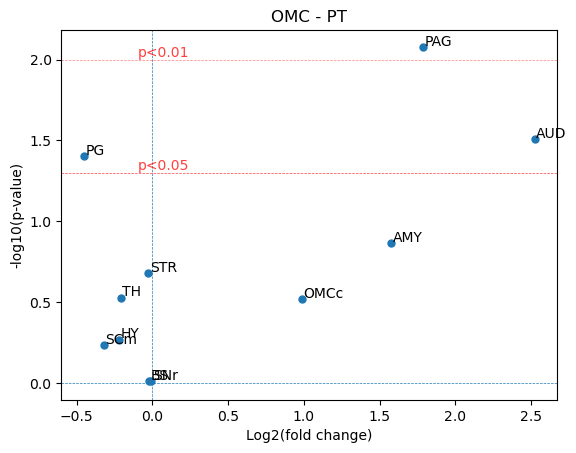

In [81]:





df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - PT")
plt.xlabel('Log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_pt_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_pt_volcano.svg',dpi=300, bbox_inches='tight')
